# Report

## Maxime Benoit-Gagne

## August 13, 2021

# First, load libraries

In [1]:
import datetime
import netcdf_tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import pathlib
import scipy
import scipy.interpolate
import TaylorDiagramMBG
import vstats

plt.close("all")

# Grid

drF is the r cell face separation, meaning the thickness of each depth layer (in m)

it corresponds to delR on https://mitgcm.readthedocs.io/en/latest/getting_started/getting_started.html#grid

In [2]:
gridfile='grid.t001.nc';
drF=netcdf_tools.read_netcdf(gridfile,'drF')

RC is the r coordiante of cell center (in m)

In [3]:
RC=netcdf_tools.read_netcdf(gridfile,'RC')

RF is the r coordinate of cell interface (in m)

In [4]:
RF=netcdf_tools.read_netcdf(gridfile,'RF')

# Model

## Non-living tracers

In [5]:
carfile='car.0000000000.t001.nc'
RF_above151=RF[RF>-151]
array2d_idepth_iT_modalkfull=netcdf_tools.read_netcdf(carfile, 'TRAC18')\
.squeeze().transpose()
array2d_idepth_iT_moddicfull=netcdf_tools.read_netcdf(carfile, 'TRAC01')\
.squeeze().transpose()
array2d_idepth_iT_moddocfull=netcdf_tools.read_netcdf(carfile, 'TRAC08')\
.squeeze().transpose()
array2d_idepth_iT_moddofefull=netcdf_tools.read_netcdf(carfile, 'TRAC11')\
.squeeze().transpose()
array2d_idepth_iT_moddonfull=netcdf_tools.read_netcdf(carfile, 'TRAC09')\
.squeeze().transpose()
array2d_idepth_iT_moddopfull=netcdf_tools.read_netcdf(carfile, 'TRAC10')\
.squeeze().transpose()
array2d_idepth_iT_modfetfull=netcdf_tools.read_netcdf(carfile, 'TRAC07')\
.squeeze().transpose()
array2d_idepth_iT_modnh4full=netcdf_tools.read_netcdf(carfile, 'TRAC02')\
.squeeze().transpose()
array2d_idepth_iT_modno2full=netcdf_tools.read_netcdf(carfile, 'TRAC03')\
.squeeze().transpose()
array2d_idepth_iT_modno3full=netcdf_tools.read_netcdf(carfile, 'TRAC04')\
.squeeze().transpose()
array2d_idepth_iT_modo2full=netcdf_tools.read_netcdf(carfile, 'TRAC19')\
.squeeze().transpose()
array2d_idepth_iT_modpicfull=netcdf_tools.read_netcdf(carfile, 'TRAC17')\
.squeeze().transpose()
array2d_idepth_iT_modpo4full=netcdf_tools.read_netcdf(carfile, 'TRAC05')\
.squeeze().transpose()
array2d_idepth_iT_modpocfull=netcdf_tools.read_netcdf(carfile, 'TRAC12')\
.squeeze().transpose()
array2d_idepth_iT_modpofefull=netcdf_tools.read_netcdf(carfile, 'TRAC16')\
.squeeze().transpose()
array2d_idepth_iT_modponfull=netcdf_tools.read_netcdf(carfile, 'TRAC13')\
.squeeze().transpose()
array2d_idepth_iT_modpopfull=netcdf_tools.read_netcdf(carfile, 'TRAC14')\
.squeeze().transpose()
array2d_idepth_iT_modposifull=netcdf_tools.read_netcdf(carfile, 'TRAC15')\
.squeeze().transpose()
array2d_idepth_iT_modposioh4full=netcdf_tools.read_netcdf(carfile, 'TRAC06')\
.squeeze().transpose()

### Non-living for the $10^{th}$ year

In [6]:
iyeartempo=10

In [7]:
array1d_iT1y_iTtempo=np.arange(365*(iyeartempo-1)+0,365*(iyeartempo-1)+365)
first_year366=np.arange(0,366) # first year for heatmaps

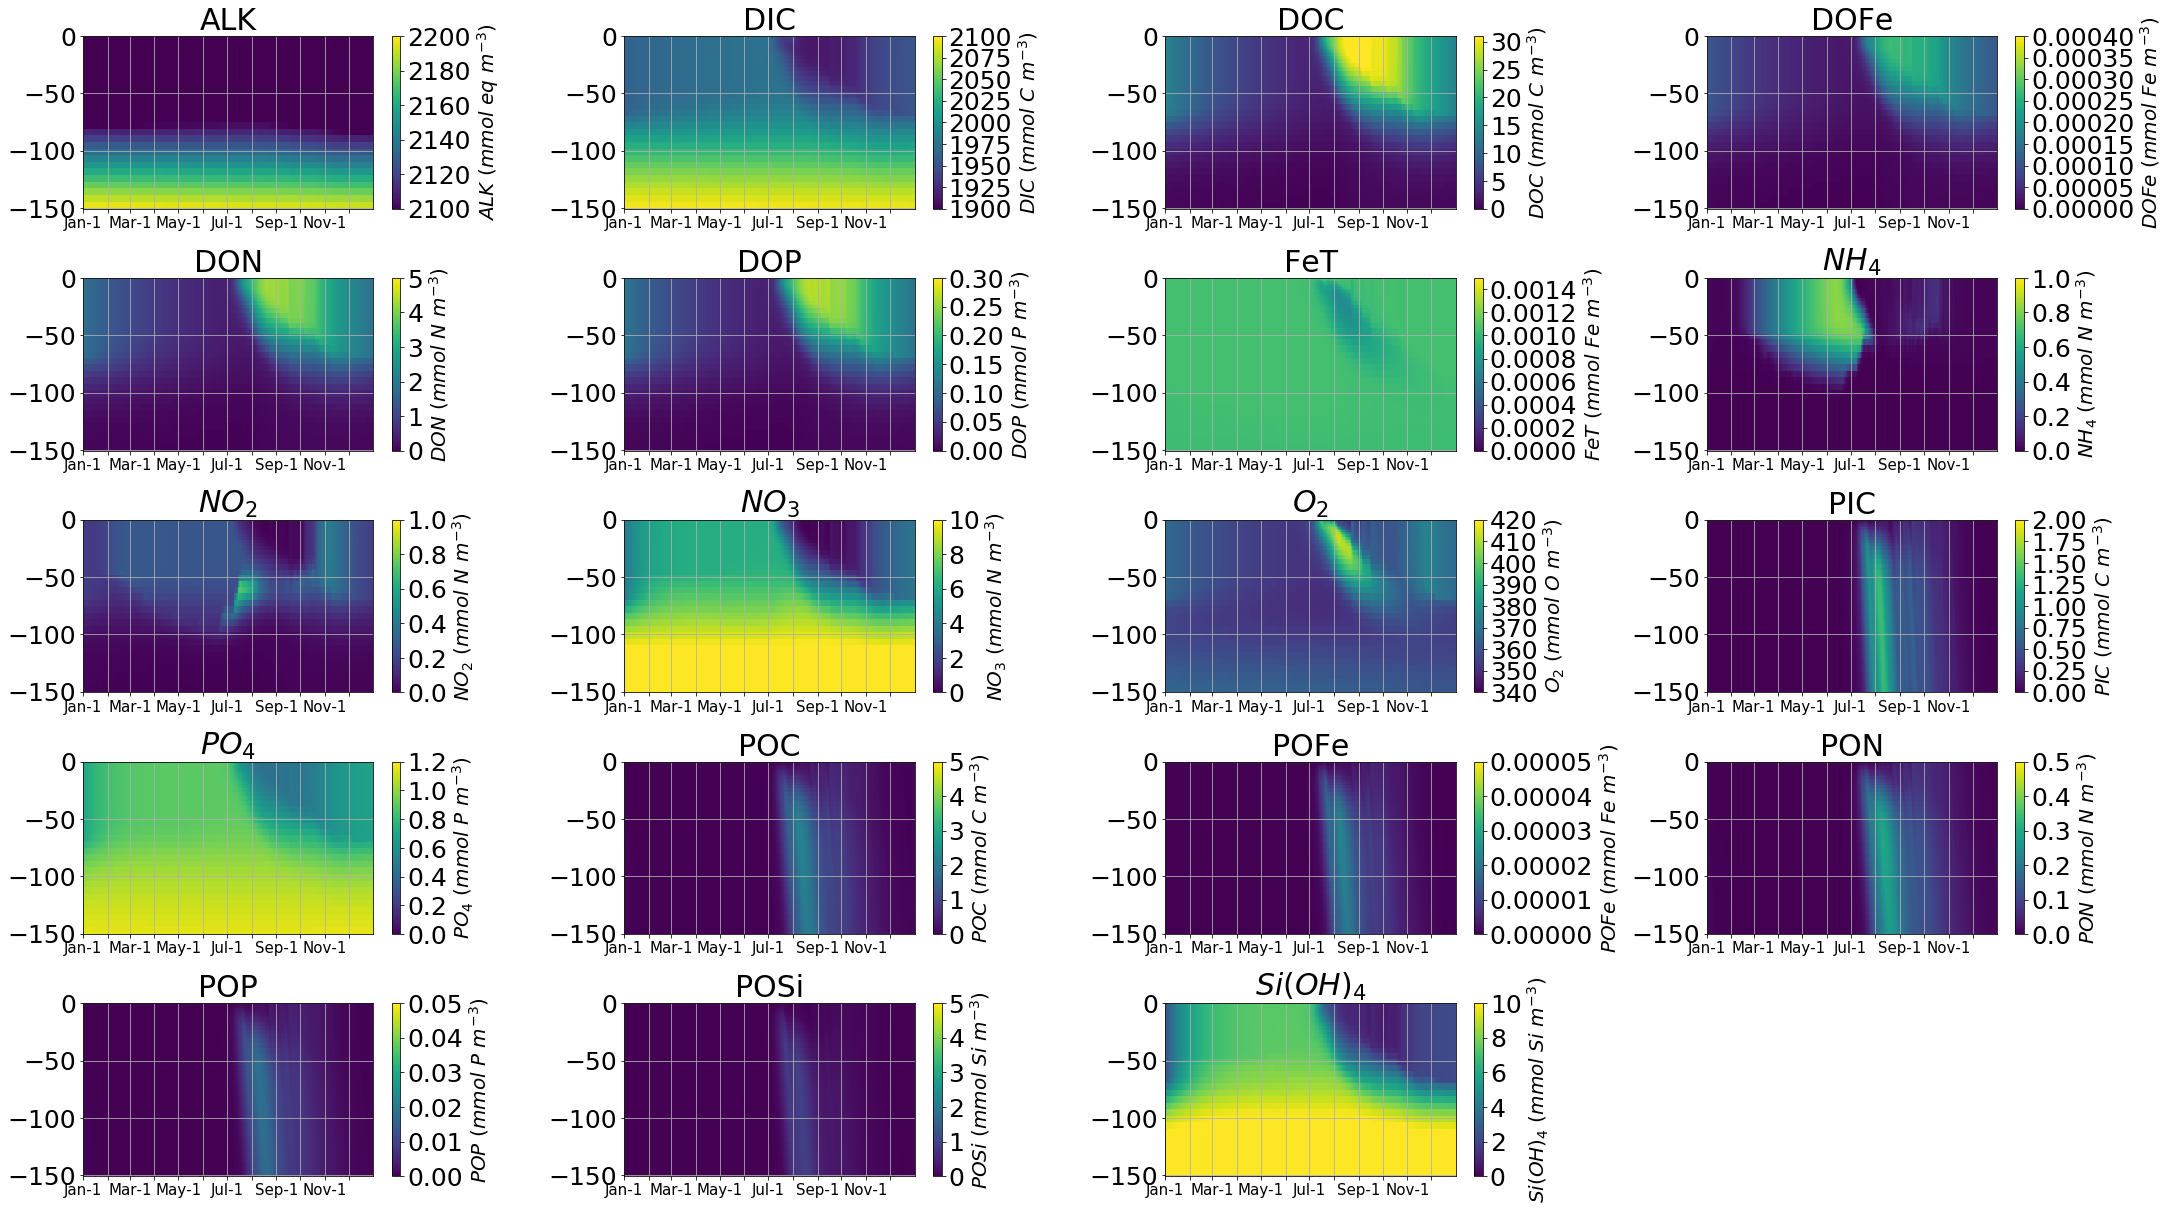

In [8]:
with plt.style.context('many_heat_maps.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
              181, 212, 243, 273, 304, 334])
    labels=('Jan-1','','Mar-1','','May-1','',
            'Jul-1','','Sep-1','','Nov-1','')
    fig,axs=plt.subplots(5,4,figsize=(30, 17))
    
    # --- ALK
    ax=axs[0,0]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_modalkfull[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=2100,
                     vmax=2200
                 )
    ax.set_title('ALK')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$ALK\ (mmol\ eq\ m^{-3})$')
    
    # --- DIC
    ax=axs[0,1]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_moddicfull[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=1900,
                     vmax=2100
                 )
    ax.set_title('DIC')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$DIC\ (mmol\ C\ m^{-3})$')
    
    # --- DOC
    ax=axs[0,2]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_moddocfull[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=31
                 )
    ax.set_title('DOC')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$DOC\ (mmol\ C\ m^{-3})$')
    
    # --- DOFe
    ax=axs[0,3]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_moddofefull[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=4E-4
                 )
    ax.set_title('DOFe')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$DOFe\ (mmol\ Fe\ m^{-3})$')
    
    # --- DON
    ax=axs[1,0]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_moddonfull[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=5
                 )
    ax.set_title('DON')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$DON\ (mmol\ N\ m^{-3})$')
    
    # --- DOP
    ax=axs[1,1]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_moddopfull[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=0.3
                 )
    ax.set_title('DOP')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$DOP\ (mmol\ P\ m^{-3})$')
    
    # --- FeT
    ax=axs[1,2]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_modfetfull[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=1.5E-3
                 )
    ax.set_title('FeT')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$FeT\ (mmol\ Fe\ m^{-3})$')
    
    # --- NH4
    ax=axs[1,3]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_modnh4full[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=1
                 )
    ax.set_title('$NH_4$')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$NH_4\ (mmol\ N\ m^{-3})$')
    
    # --- NO2
    ax=axs[2,0]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_modno2full[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=1
                 )
    ax.set_title('$NO_2$')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$NO_2\ (mmol\ N\ m^{-3})$')
    
    # --- NO3
    ax=axs[2,1]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_modno3full[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=10
                 )
    ax.set_title('$NO_3$')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$NO_3\ (mmol\ N\ m^{-3})$')
    
    # --- O2
    ax=axs[2,2]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_modo2full[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=340,
                     vmax=420
                 )
    ax.set_title('$O_2$')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$O_2\ (mmol\ O\ m^{-3})$')
    
    # --- PIC
    ax=axs[2,3]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_modpicfull[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=2
                 )
    ax.set_title('PIC')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$PIC\ (mmol\ C\ m^{-3})$')
    
    # --- PO4
    ax=axs[3,0]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_modpo4full[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=1.2
                 )
    ax.set_title('$PO_4$')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$PO_4\ (mmol\ P\ m^{-3})$')
    
    # --- POC
    ax=axs[3,1]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_modpocfull[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=5
                 )
    ax.set_title('POC')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$POC\ (mmol\ C\ m^{-3})$')
    
    # --- POFe
    ax=axs[3,2]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_modpofefull[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=5E-5
                 )
    ax.set_title('POFe')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$POFe\ (mmol\ Fe\ m^{-3})$')
    
    # --- PON
    ax=axs[3,3]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_modponfull[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=0.5
                 )
    ax.set_title('PON')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$PON\ (mmol\ N\ m^{-3})$')
    
    # --- POP
    ax=axs[4,0]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_modpopfull[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=0.05
                 )
    ax.set_title('POP')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$POP\ (mmol\ P\ m^{-3})$')
    
    # --- POSi
    ax=axs[4,1]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_modposifull[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=5
                 )
    ax.set_title('POSi')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$POSi\ (mmol\ Si\ m^{-3})$')
    
    # --- SiOH4
    ax=axs[4,2]
    im=ax.pcolormesh(first_year366,
                     RF_above151,
                     array2d_idepth_iT_modposioh4full[0:(RF_above151.size)-1,
                                                  array1d_iT1y_iTtempo],
                     vmin=0,
                     vmax=10
                 )
    ax.set_title('$Si(OH)_4$')
    ax.set_xticklabels([])
    ax.set_xlim(first_year366[0],first_year366[-1])
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$Si(OH)_4\ (mmol\ Si\ m^{-3})$')
    
    # --- NOTHING
    ax=axs[4,3]
    ax.axis('off')
    
    fig.tight_layout()
    plt.savefig('car.0000000000.t001.year'\
                +str(iyeartempo)+'.nutrients.png')

Figure 1. Non-living tracers for the $10^{th}$ year of the simulation.

### Non-living for the $20^{th}$ year

In [9]:
# iyeartempo=20

In [10]:
# array1d_iT1y_iTtempo=np.arange(365*(iyeartempo-1)+0,365*(iyeartempo-1)+365)
# first_year366=np.arange(0,366) # first year for heatmaps

In [11]:
# with plt.style.context('many_heat_maps.mplstyle'):
#     locs=np.array([0, 31, 59, 90, 120, 151,
#               181, 212, 243, 273, 304, 334])
#     labels=('Jan-1','','Mar-1','','May-1','',
#             'Jul-1','','Sep-1','','Nov-1','')
#     fig,axs=plt.subplots(5,4,figsize=(30, 17))
    
#     # --- ALK
#     ax=axs[0,0]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_modalkfull[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=2100,
#                      vmax=2200
#                  )
#     ax.set_title('ALK')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$ALK\ (mmol\ eq\ m^{-3})$')
    
#     # --- DIC
#     ax=axs[0,1]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_moddicfull[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=1900,
#                      vmax=2100
#                  )
#     ax.set_title('DIC')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$DIC\ (mmol\ C\ m^{-3})$')
    
#     # --- DOC
#     ax=axs[0,2]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_moddocfull[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=31
#                  )
#     ax.set_title('DOC')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$DOC\ (mmol\ C\ m^{-3})$')
    
#     # --- DOFe
#     ax=axs[0,3]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_moddofefull[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=3E-4
#                  )
#     ax.set_title('DOFe')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$DOFe\ (mmol\ Fe\ m^{-3})$')
    
#     # --- DON
#     ax=axs[1,0]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_moddonfull[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=5
#                  )
#     ax.set_title('DON')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$DON\ (mmol\ N\ m^{-3})$')
    
#     # --- DOP
#     ax=axs[1,1]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_moddopfull[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=0.3
#                  )
#     ax.set_title('DOP')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$DOP\ (mmol\ P\ m^{-3})$')
    
#     # --- FeT
#     ax=axs[1,2]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_modfetfull[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=1E-3
#                  )
#     ax.set_title('FeT')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$FeT\ (mmol\ Fe\ m^{-3})$')
    
#     # --- NH4
#     ax=axs[1,3]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_modnh4full[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=1
#                  )
#     ax.set_title('$NH_4$')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$NH_4\ (mmol\ N\ m^{-3})$')
    
#     # --- NO2
#     ax=axs[2,0]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_modno2full[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=1
#                  )
#     ax.set_title('$NO_2$')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$NO_2\ (mmol\ N\ m^{-3})$')
    
#     # --- NO3
#     ax=axs[2,1]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_modno3full[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=10
#                  )
#     ax.set_title('$NO_3$')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$NO_3\ (mmol\ N\ m^{-3})$')
    
#     # --- O2
#     ax=axs[2,2]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_modo2full[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=340,
#                      vmax=420
#                  )
#     ax.set_title('$O_2$')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$O_2\ (mmol\ O\ m^{-3})$')
    
#     # --- PIC
#     ax=axs[2,3]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_modpicfull[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=2
#                  )
#     ax.set_title('PIC')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$PIC\ (mmol\ C\ m^{-3})$')
    
#     # --- PO4
#     ax=axs[3,0]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_modpo4full[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=1.2
#                  )
#     ax.set_title('$PO_4$')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$PO_4\ (mmol\ P\ m^{-3})$')
    
#     # --- POC
#     ax=axs[3,1]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_modpocfull[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=5
#                  )
#     ax.set_title('POC')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$POC\ (mmol\ C\ m^{-3})$')
    
#     # --- POFe
#     ax=axs[3,2]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_modpofefull[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=5E-5
#                  )
#     ax.set_title('POFe')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$POFe\ (mmol\ Fe\ m^{-3})$')
    
#     # --- PON
#     ax=axs[3,3]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_modponfull[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=0.5
#                  )
#     ax.set_title('PON')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$PON\ (mmol\ N\ m^{-3})$')
    
#     # --- POP
#     ax=axs[4,0]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_modpopfull[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=0.05
#                  )
#     ax.set_title('POP')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$POP\ (mmol\ P\ m^{-3})$')
    
#     # --- POSi
#     ax=axs[4,1]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_modposifull[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=5
#                  )
#     ax.set_title('POSi')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$POSi\ (mmol\ Si\ m^{-3})$')
    
#     # --- SiOH4
#     ax=axs[4,2]
#     im=ax.pcolormesh(first_year366,
#                      RF_above151,
#                      array2d_idepth_iT_modposioh4full[0:(RF_above151.size)-1,
#                                                   array1d_iT1y_iTtempo],
#                      vmin=0,
#                      vmax=10
#                  )
#     ax.set_title('$Si(OH)_4$')
#     ax.set_xticklabels([])
#     ax.set_xlim(first_year366[0],first_year366[-1])
#     ax.grid()
#     ax.set_xticks(locs)
#     ax.set_xticklabels(labels)
#     ax.set_yticks([0,-50,-100,-150])
#     fig.colorbar(im, ax=ax, label='$Si(OH)_4\ (mmol\ Si\ m^{-3})$')
    
#     # --- NOTHING
#     ax=axs[4,3]
#     ax.axis('off')
    
#     fig.tight_layout()
#     plt.savefig('car.0000000000.t001.year'\
#                 +str(iyeartempo)+'.nutrients.png')

Figure 2. Non-living tracers for the $20^{th}$ year of the simulation.

### Non-living for $10$ years

In [12]:
nbyr=10

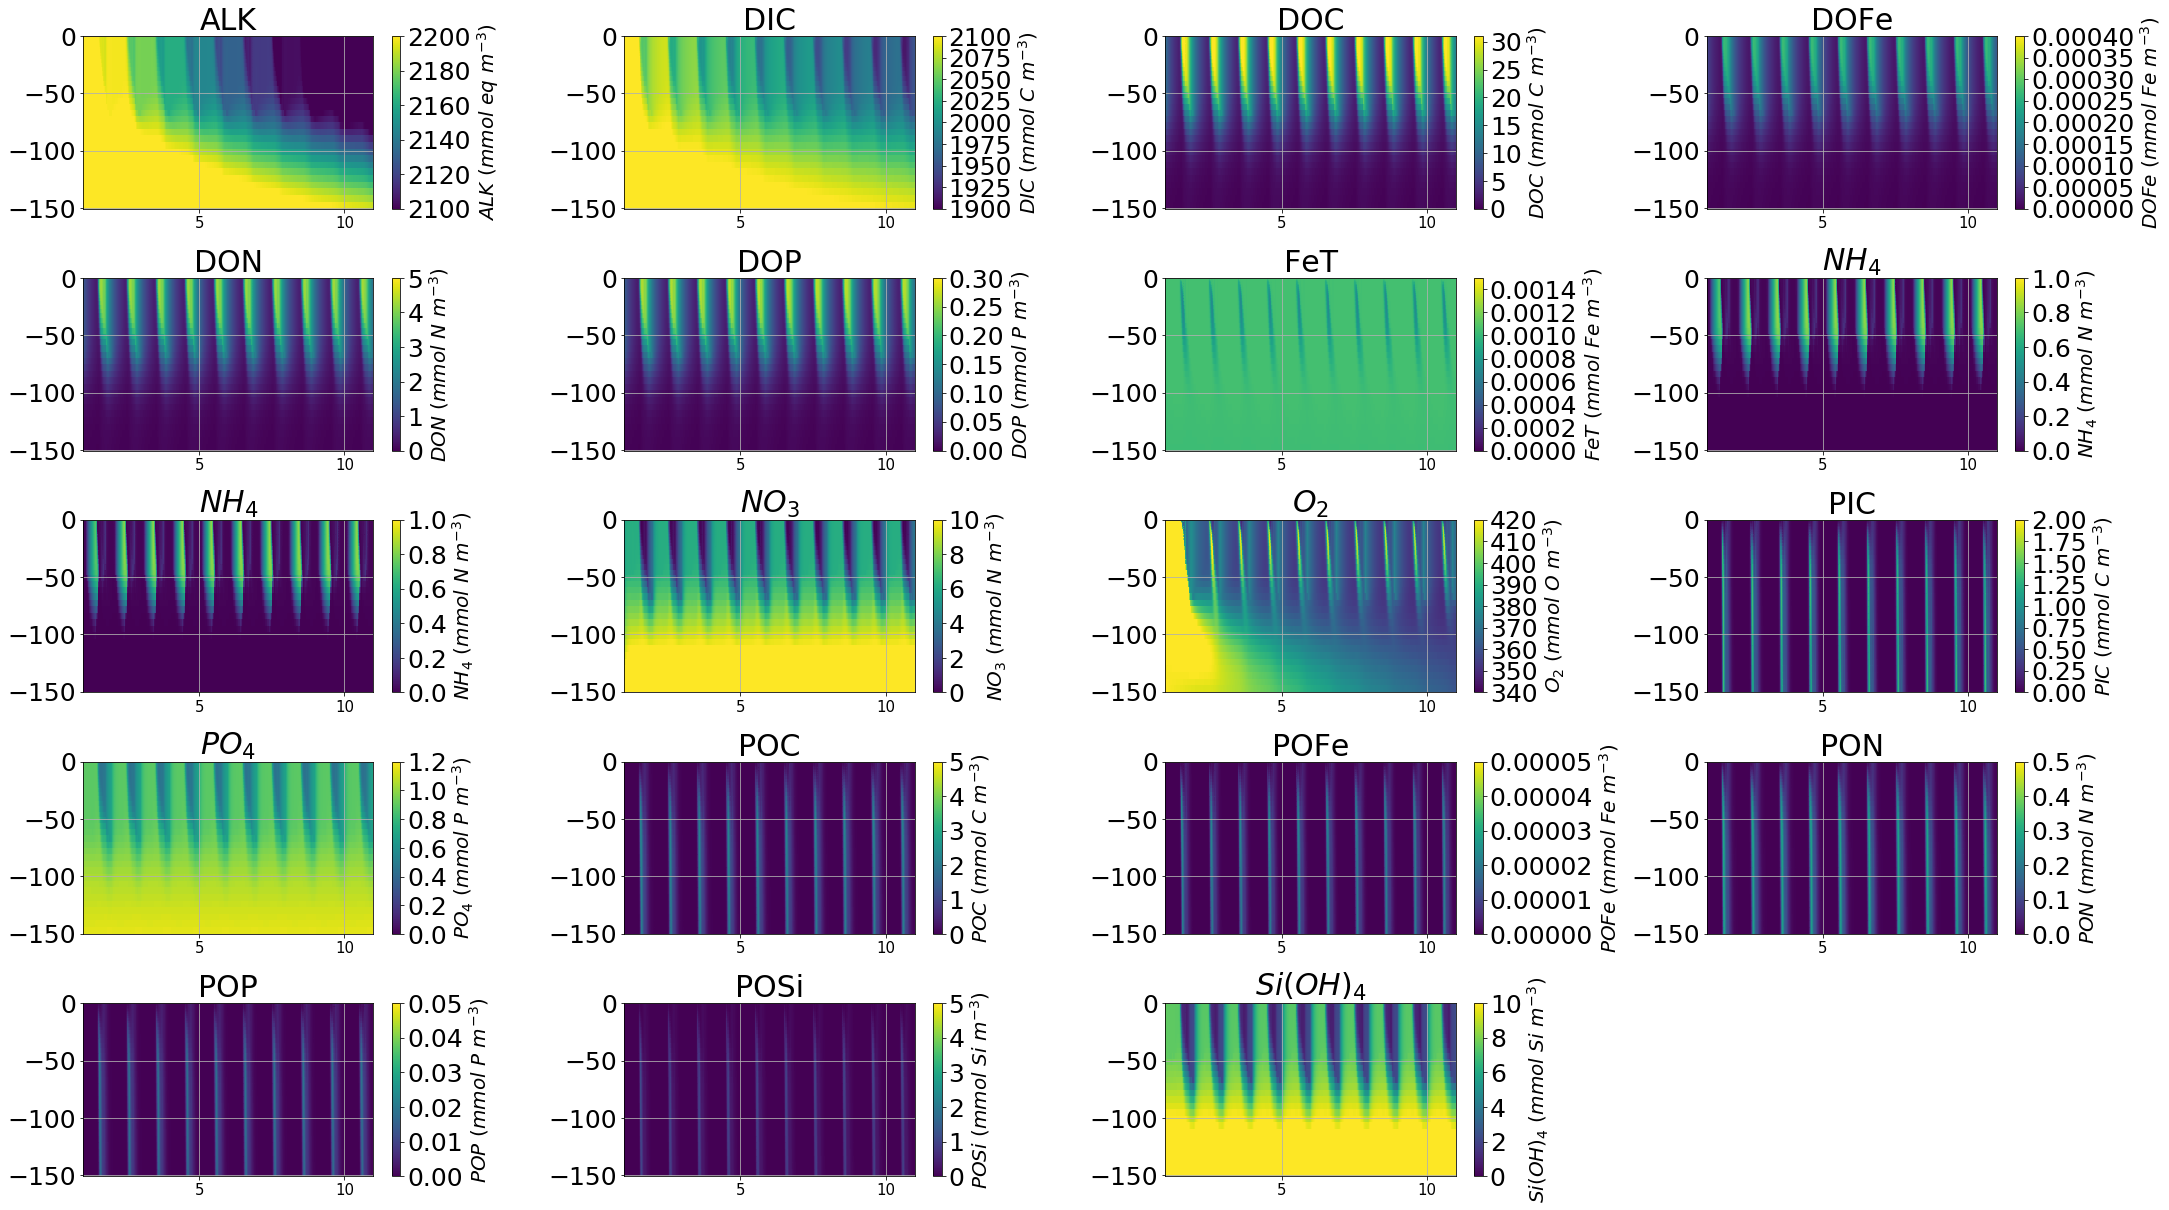

In [13]:
array1d_iT_iTforplot=np.arange(1,365*nbyr+1)
array1d_iT_iTforpcolormesh=np.arange(1,365*nbyr+2)
locs=list()
labels=range(5,nbyr+1,5)
for year in labels:
    loc=1+365*(year-1)
    locs.append(loc)
RF_above151=RF[RF>-151]
with plt.style.context('many_heat_maps.mplstyle'):
    fig,axs=plt.subplots(5,4,figsize=(30, 17))
    
    # --- ALK
    ax=axs[0,0]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_modalkfull[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=2100,
                     vmax=2200
                 )
    ax.set_title('ALK')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$ALK\ (mmol\ eq\ m^{-3})$')
    
    # --- DIC
    ax=axs[0,1]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_moddicfull[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=1900,
                     vmax=2100
                 )
    ax.set_title('DIC')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$DIC\ (mmol\ C\ m^{-3})$')
    
    # --- DOC
    ax=axs[0,2]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_moddocfull[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=31
                 )
    ax.set_title('DOC')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$DOC\ (mmol\ C\ m^{-3})$')
    
    # --- DOFe
    ax=axs[0,3]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_moddofefull[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=4E-4
                 )
    ax.set_title('DOFe')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$DOFe\ (mmol\ Fe\ m^{-3})$')
    
    # --- DON
    ax=axs[1,0]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_moddonfull[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=5
                 )
    ax.set_title('DON')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$DON\ (mmol\ N\ m^{-3})$')
    
    # --- DOP
    ax=axs[1,1]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_moddopfull[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=0.3
                 )
    ax.set_title('DOP')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$DOP\ (mmol\ P\ m^{-3})$')
    
    # --- FeT
    ax=axs[1,2]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_modfetfull[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=1.5E-3
                 )
    ax.set_title('FeT')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$FeT\ (mmol\ Fe\ m^{-3})$')
    
    # --- NH4
    ax=axs[1,3]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_modnh4full[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=1
                 )
    ax.set_title('$NH_4$')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$NH_4\ (mmol\ N\ m^{-3})$')
    
    # --- NO2
    ax=axs[2,0]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_modnh4full[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=1
                 )
    ax.set_title('$NH_4$')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$NH_4\ (mmol\ N\ m^{-3})$')
    
    # --- NO3
    ax=axs[2,1]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_modno3full[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=10
                 )
    ax.set_title('$NO_3$')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$NO_3\ (mmol\ N\ m^{-3})$')
    
    # --- O2
    ax=axs[2,2]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_modo2full[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=340,
                     vmax=420
                 )
    ax.set_title('$O_2$')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$O_2\ (mmol\ O\ m^{-3})$')
    
    # --- PIC
    ax=axs[2,3]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_modpicfull[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=2
                 )
    ax.set_title('PIC')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$PIC\ (mmol\ C\ m^{-3})$')
    
    # --- PO4
    ax=axs[3,0]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_modpo4full[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=1.2
                 )
    ax.set_title('$PO_4$')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$PO_4\ (mmol\ P\ m^{-3})$')
    
    # --- POC
    ax=axs[3,1]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_modpocfull[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=5
                 )
    ax.set_title('POC')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$POC\ (mmol\ C\ m^{-3})$')
    
    # --- POFe
    ax=axs[3,2]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_modpofefull[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=5E-5
                 )
    ax.set_title('POFe')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$POFe\ (mmol\ Fe\ m^{-3})$')
    
    # --- PON
    ax=axs[3,3]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_modponfull[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=0.5
                 )
    ax.set_title('PON')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$PON\ (mmol\ N\ m^{-3})$')
    
    # --- POP
    ax=axs[4,0]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_modpopfull[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=0.05
                 )
    ax.set_title('POP')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$POP\ (mmol\ P\ m^{-3})$')
    
    # --- POSi
    ax=axs[4,1]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_modposifull[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=5
                 )
    ax.set_title('POSi')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$POSi\ (mmol\ Si\ m^{-3})$')
    
    # --- SiOH4
    ax=axs[4,2]
    im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                     RF_above151,
                     array2d_idepth_iT_modposioh4full[0:(RF_above151.size)-1,
                                                  0:(365*nbyr)],
                     vmin=0,
                     vmax=10
                 )
    ax.set_title('$Si(OH)_4$')
    ax.grid()
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_yticks([0,-50,-100,-150])
    fig.colorbar(im, ax=ax, label='$Si(OH)_4\ (mmol\ Si\ m^{-3})$')
    
    # --- NOTHING
    ax=axs[4,3]
    ax.axis('off')
    
    fig.tight_layout()
    plt.savefig('car.0000000000.t001.allyears.nutrients.png')

Figure 3. Non-living tracers for the 10 years of the simulation.

## Function to get the description of a variable

In [14]:
def get_longname(varname):
    if varname=='TRAC21':
        longname='$Prochlorococcus$ $1\ \mu m$'
    elif varname=='TRAC22':
        longname='$Synechococcus$ $1\ \mu m$'
    elif varname=='TRAC23':
        longname='Small Eukaryotes $1\ \mu m$'
    elif varname=='TRAC24':
        longname='Small Eukaryotes $2\ \mu m$'
    elif varname=='TRAC25':
        longname='Other Eukaryotes $3\ \mu m$'
    elif varname=='TRAC26':
        longname='Other Eukaryotes $4\ \mu m$'
    elif varname=='TRAC27':
        longname='Other Eukaryotes $7\ \mu m$'
    elif varname=='TRAC28':
        longname='Other Eukaryotes $10\ \mu m$'
    elif varname=='TRAC29':
        longname='Other Eukaryotes $15\ \mu m$'
    elif varname=='TRAC30':
        longname='Diazotrophs $3\ \mu m$'
    elif varname=='TRAC31':
        longname='Diazotrophs $4\ \mu m$'
    elif varname=='TRAC32':
        longname='Diazotrophs $7\ \mu m$'
    elif varname=='TRAC33':
        longname='Diazotrophs $10\ \mu m$'
    elif varname=='TRAC34':
        longname='$Trichodesmium$ $15\ \mu m$'
    elif varname=='TRAC35':
        longname='Diatoms $7\ \mu m$'
    elif varname=='TRAC36':
        longname='Diatoms $10\ \mu m$'
    elif varname=='TRAC37':
        longname='Diatoms $15\ \mu m$'
    elif varname=='TRAC38':
        longname='Diatoms $22\ \mu m$'
    elif varname=='TRAC39':
        longname='Diatoms $32\ \mu m$'
    elif varname=='TRAC40':
        longname='Diatoms $47\ \mu m$'
    elif varname=='TRAC41':
        longname='Diatoms $70\ \mu m$'
    elif varname=='TRAC42':
        longname='Diatoms $104\ \mu m$'
    elif varname=='TRAC43':
        longname='Diatoms $154\ \mu m$'
    elif varname=='TRAC44':
        longname='Dinoflagellates $7\ \mu m$'
    elif varname=='TRAC45':
        longname='Dinoflagellates $10\ \mu m$'
    elif varname=='TRAC46':
        longname='Dinoflagellates $15\ \mu m$'
    elif varname=='TRAC47':
        longname='Dinoflagellates $22\ \mu m$'
    elif varname=='TRAC48':
        longname='Dinoflagellates $32\ \mu m$'
    elif varname=='TRAC49':
        longname='Dinoflagellates $47\ \mu m$'
    elif varname=='TRAC50':
        longname='Dinoflagellates $70\ \mu m$'
    elif varname=='TRAC51':
        longname='Dinoflagellates $104\ \mu m$'
    elif varname=='TRAC52':
        longname='Dinoflagellates $154\ \mu m$'
    elif varname=='TRAC53':
        longname='Dinoflagellates $228\ \mu m$'
    elif varname=='TRAC54':
        longname='Zooplankton $7\ \mu m$'
    elif varname=='TRAC55':
        longname='Zooplankton $10\ \mu m$'
    elif varname=='TRAC56':
        longname='Zooplankton $15\ \mu m$'
    elif varname=='TRAC57':
        longname='Zooplankton $22\ \mu m$'
    elif varname=='TRAC58':
        longname='Zooplankton $32\ \mu m$'
    elif varname=='TRAC59':
        longname='Zooplankton $47\ \mu m$'
    elif varname=='TRAC60':
        longname='Zooplankton $70\ \mu m$'
    elif varname=='TRAC61':
        longname='Zooplankton $104\ \mu m$'
    elif varname=='TRAC62':
        longname='Zooplankton $154\ \mu m$'
    elif varname=='TRAC63':
        longname='Zooplankton $228\ \mu m$'
    elif varname=='TRAC64':
        longname='Zooplankton $339\ \mu m$'
    elif varname=='TRAC65':
        longname='Zooplankton $502\ \mu m$'
    elif varname=='TRAC66':
        longname='Zooplankton $744\ \mu m$'
    elif varname=='TRAC67':
        longname='Zooplankton $1103\ \mu m$'
    elif varname=='TRAC68':
        longname='Zooplankton $1636\ \mu m$'
    elif varname=='TRAC69':
        longname='Zooplankton $2425\ \mu m$'
        
    else:
        longname=''
    return longname

## Prokaryotes, small eukaryotes and other eukaryotes

### Prokaryotes, small eukaryotes and other eukaryotes for the $10^{th}$ year

In [15]:
iyeartempo=10

In [16]:
array1d_iT1y_iTtempo=np.arange(365*(iyeartempo-1)+0,365*(iyeartempo-1)+365)
first_year366=np.arange(0,366) # first year for heatmaps

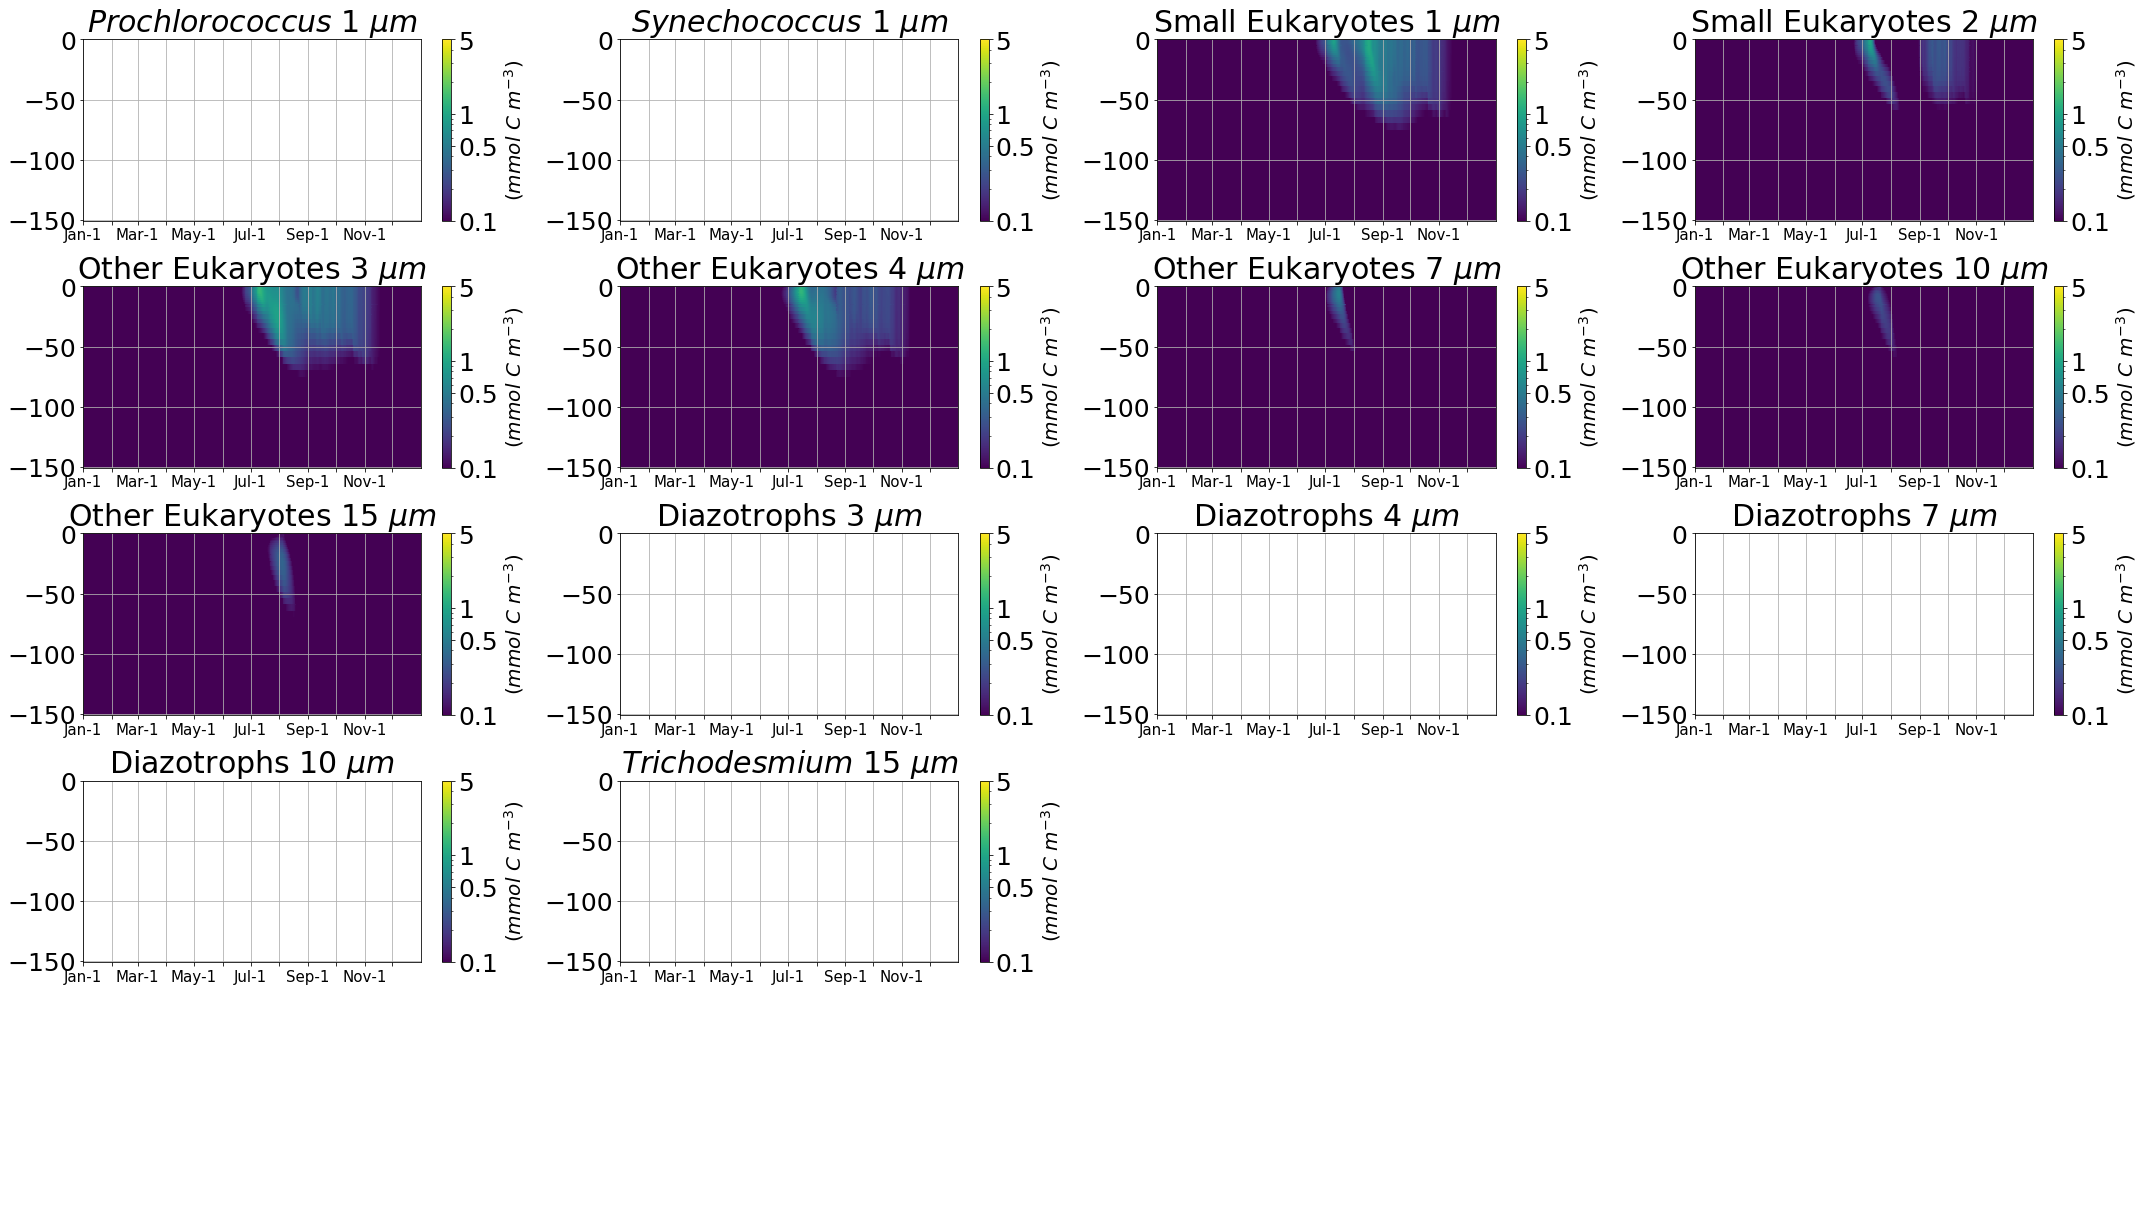

In [17]:
carfile='car.0000000000.t001.nc'
RF_above151=RF[RF>-151]
with plt.style.context('many_heat_maps.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
              181, 212, 243, 273, 304, 334])
    labels=('Jan-1','','Mar-1','','May-1','',
            'Jul-1','','Sep-1','','Nov-1','')
    fig,axs=plt.subplots(5,4,figsize=(30, 17))
    
    for itracer in range(21,35):
        varname='TRAC'+str(itracer).zfill(2)
        array2d_idepth_iT_modtracerfull=netcdf_tools.read_netcdf(carfile, varname)\
.squeeze().transpose()
        ax=axs[(itracer-21)//4,(itracer-21)%4]
        im=ax.pcolormesh(first_year366,
                         RF_above151,
                         array2d_idepth_iT_modtracerfull[0:(RF_above151.size)-1,
                                                         array1d_iT1y_iTtempo],
                         norm=mpl.colors.LogNorm(vmin=0.1,vmax=5))
        longname=get_longname(varname)
        ax.set_title(longname)
        ax.set_xticklabels([])
        ax.set_xlim(first_year366[0],first_year366[-1])
        ax.grid()
        ax.set_xticks(locs)
        ax.set_xticklabels(labels)
        ax.set_yticks([0,-50,-100,-150])
        fig.colorbar(im,
                     ax=ax,
                     ticks=[0.1,0.5,1,5],
                     format='%.1g',
                     label='$(mmol\ C\ m^{-3})$')

    # --- NOTHING
    ax=axs[3,2]
    ax.axis('off')
    ax=axs[3,3]
    ax.axis('off')
    ax=axs[4,0]
    ax.axis('off')
    ax=axs[4,1]
    ax.axis('off')
    ax=axs[4,2]
    ax.axis('off')
    ax=axs[4,3]
    ax.axis('off')
    
    fig.tight_layout()
    plt.savefig('car.0000000000.t001.year'\
                +str(iyeartempo)+'.prok.small.other.png')

Figure 4. Prokaryotes, small eukaryotes and other eukaryotes
for the $10^{th}$ year of the simulation.

### Prokaryotes, small eukaryotes and other eukaryotes for the $20^{th}$ year

In [18]:
# iyeartempo=20

In [19]:
# array1d_iT1y_iTtempo=np.arange(365*(iyeartempo-1)+0,365*(iyeartempo-1)+365)
# first_year366=np.arange(0,366) # first year for heatmaps

In [20]:
# carfile='car.0000000000.t001.nc'
# RF_above151=RF[RF>-151]
# with plt.style.context('many_heat_maps.mplstyle'):
#     locs=np.array([0, 31, 59, 90, 120, 151,
#               181, 212, 243, 273, 304, 334])
#     labels=('Jan-1','','Mar-1','','May-1','',
#             'Jul-1','','Sep-1','','Nov-1','')
#     fig,axs=plt.subplots(5,4,figsize=(30, 17))
    
#     for itracer in range(21,35):
#         varname='TRAC'+str(itracer).zfill(2)
#         array2d_idepth_iT_modtracerfull=netcdf_tools.read_netcdf(carfile, varname)\
# .squeeze().transpose()
#         ax=axs[(itracer-21)//4,(itracer-21)%4]
#         im=ax.pcolormesh(first_year366,
#                          RF_above151,
#                          array2d_idepth_iT_modtracerfull[0:(RF_above151.size)-1,
#                                                          array1d_iT1y_iTtempo],
#                          norm=mpl.colors.LogNorm(vmin=0.1,vmax=5))
#         longname=get_longname(varname)
#         ax.set_title(longname)
#         ax.set_xticklabels([])
#         ax.set_xlim(first_year366[0],first_year366[-1])
#         ax.grid()
#         ax.set_xticks(locs)
#         ax.set_xticklabels(labels)
#         ax.set_yticks([0,-50,-100,-150])
#         fig.colorbar(im,
#                      ax=ax,
#                      ticks=[0.1,0.5,1,5],
#                      format='%.1g',
#                      label='$(mmol\ C\ m^{-3})$')

#     # --- NOTHING
#     ax=axs[3,2]
#     ax.axis('off')
#     ax=axs[3,3]
#     ax.axis('off')
#     ax=axs[4,0]
#     ax.axis('off')
#     ax=axs[4,1]
#     ax.axis('off')
#     ax=axs[4,2]
#     ax.axis('off')
#     ax=axs[4,3]
#     ax.axis('off')
    
#     fig.tight_layout()
#     plt.savefig('car.0000000000.t001.year'\
#                 +str(iyeartempo)+'.prok.small.other.png')

Figure 5. Prokaryotes, small eukaryotes and other eukaryotes
for the $20^{th}$ year of the simulation.

### Prokaryotes, small eukaryotes and other eukaryotes for $10$ years

In [21]:
nbyr=10

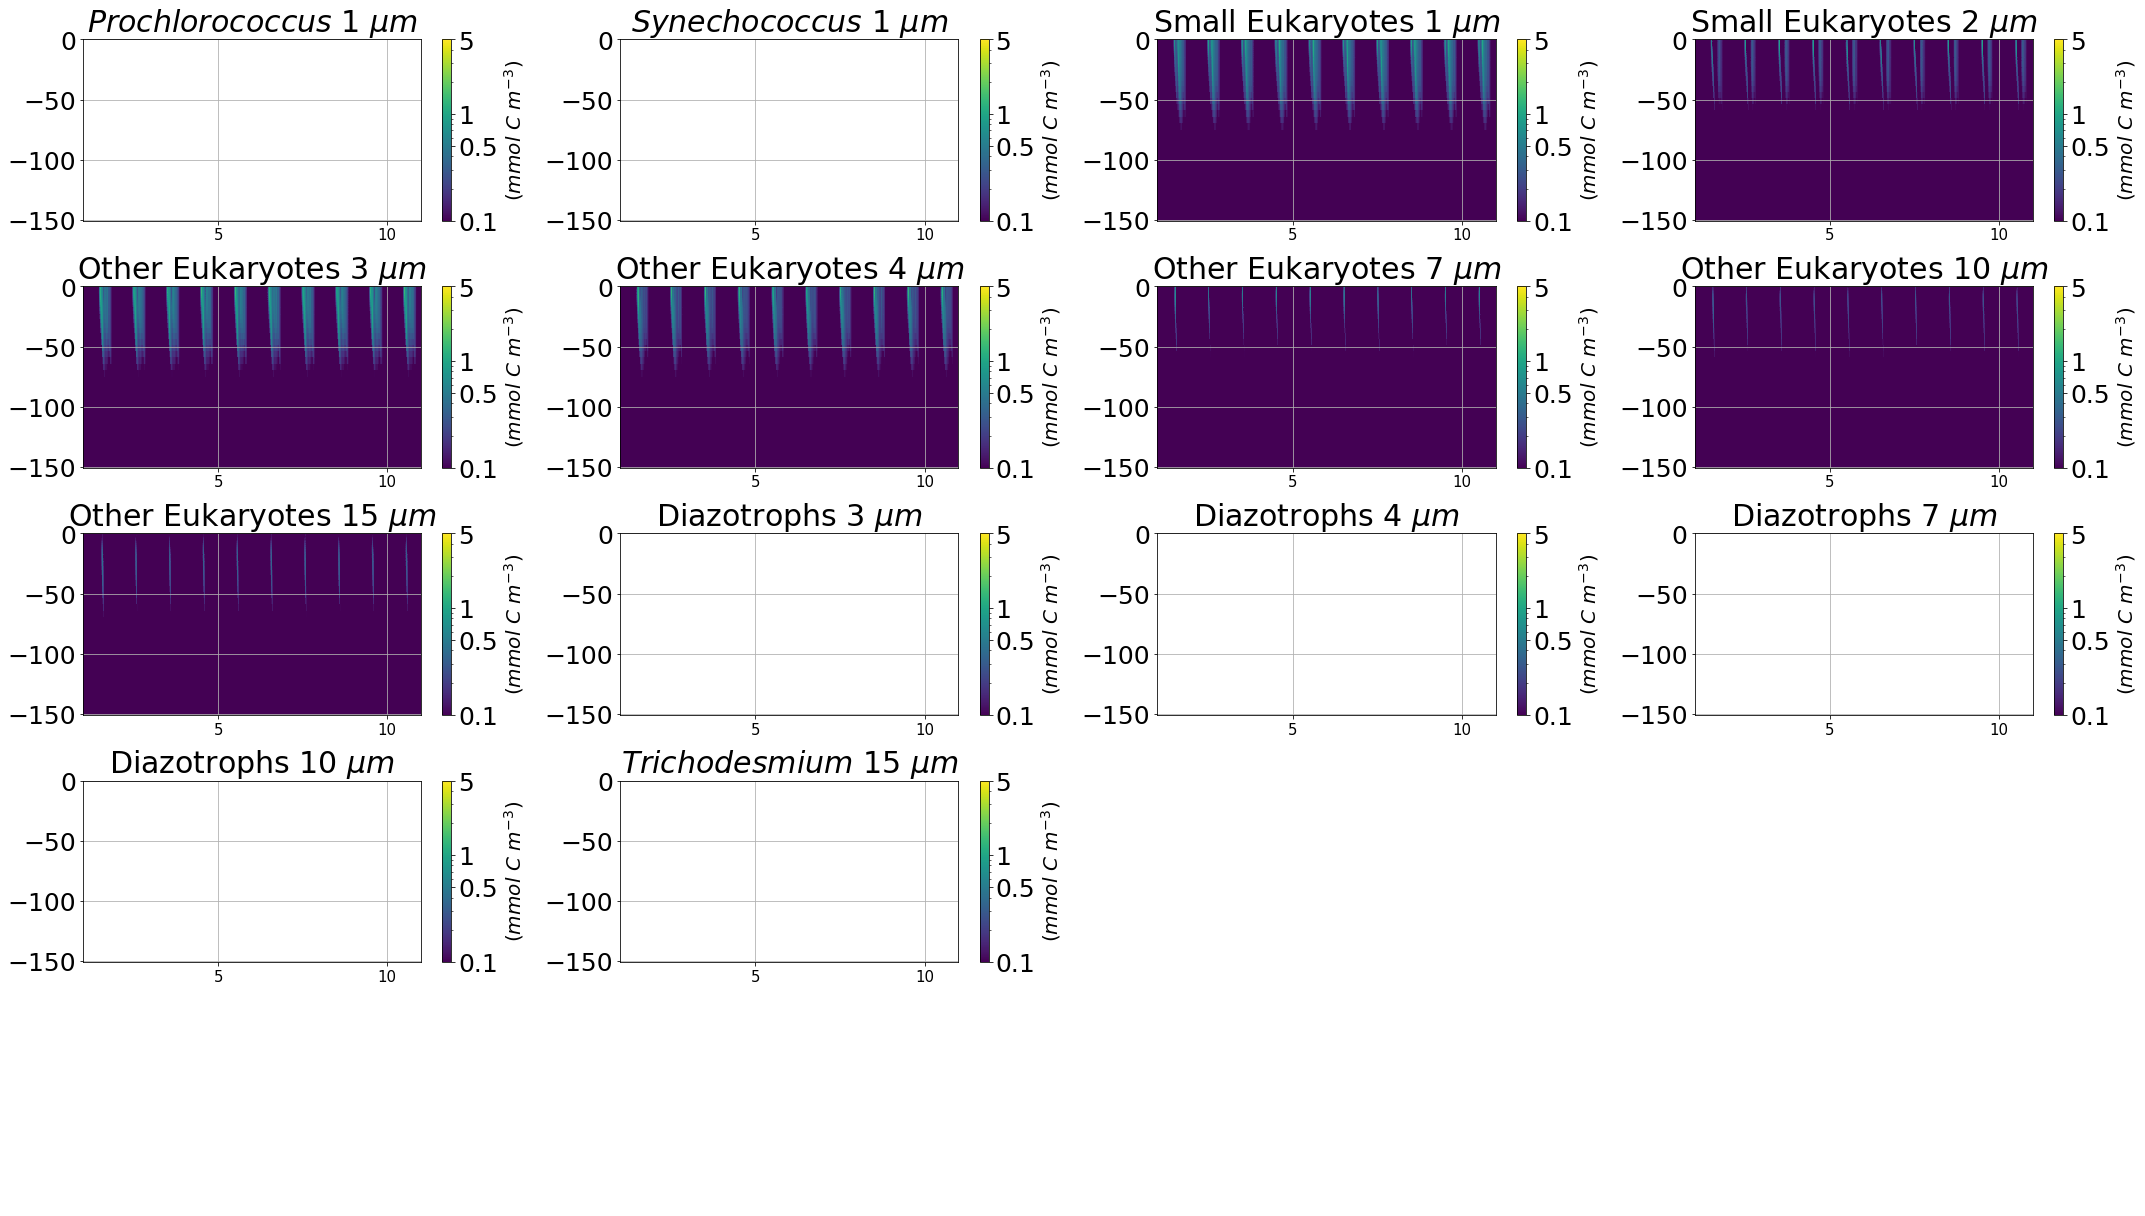

In [22]:
array1d_iT_iTforplot=np.arange(1,365*nbyr+1)
array1d_iT_iTforpcolormesh=np.arange(1,365*nbyr+2)
locs=list()
labels=range(5,nbyr+1,5)
for year in labels:
    loc=1+365*(year-1)
    locs.append(loc)
RF_above151=RF[RF>-151]
with plt.style.context('many_heat_maps.mplstyle'):
    fig,axs=plt.subplots(5,4,figsize=(30, 17))
    for itracer in range(21,35):
        varname='TRAC'+str(itracer).zfill(2)
        array2d_idepth_iT_modtracerfull=netcdf_tools.read_netcdf(carfile, varname)\
.squeeze().transpose()
        ax=axs[(itracer-21)//4,(itracer-21)%4]
        im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                         RF_above151,
                         array2d_idepth_iT_modtracerfull[0:(RF_above151.size)-1,
                                                         0:(365*nbyr)],
                         norm=mpl.colors.LogNorm(vmin=0.1,vmax=5))
        longname=get_longname(varname)
        ax.set_title(longname)
        ax.grid()
        ax.set_xticks(locs)
        ax.set_xticklabels(labels)
        ax.set_yticks([0,-50,-100,-150])
        fig.colorbar(im,
                     ax=ax,
                     ticks=[0.1,0.5,1,5],
                     format='%.1g',
                     label='$(mmol\ C\ m^{-3})$')
        
    # --- NOTHING
    ax=axs[3,2]
    ax.axis('off')
    ax=axs[3,3]
    ax.axis('off')
    ax=axs[4,0]
    ax.axis('off')
    ax=axs[4,1]
    ax.axis('off')
    ax=axs[4,2]
    ax.axis('off')
    ax=axs[4,3]
    ax.axis('off')
    
    fig.tight_layout()
    plt.savefig('car.0000000000.t001.allyears.prok.small.other.png')

Figure 6. Prokaryotes, small eukaryotes and other eukaryotes
for the 10 years of the simulation.

## Diatoms and mixotrophic dinoflagellates

### Diatoms and mixotrophic dinoflagellates for the $10^{th}$ year

In [23]:
iyeartempo=10

In [24]:
array1d_iT1y_iTtempo=np.arange(365*(iyeartempo-1)+0,365*(iyeartempo-1)+365)
first_year366=np.arange(0,366) # first year for heatmaps

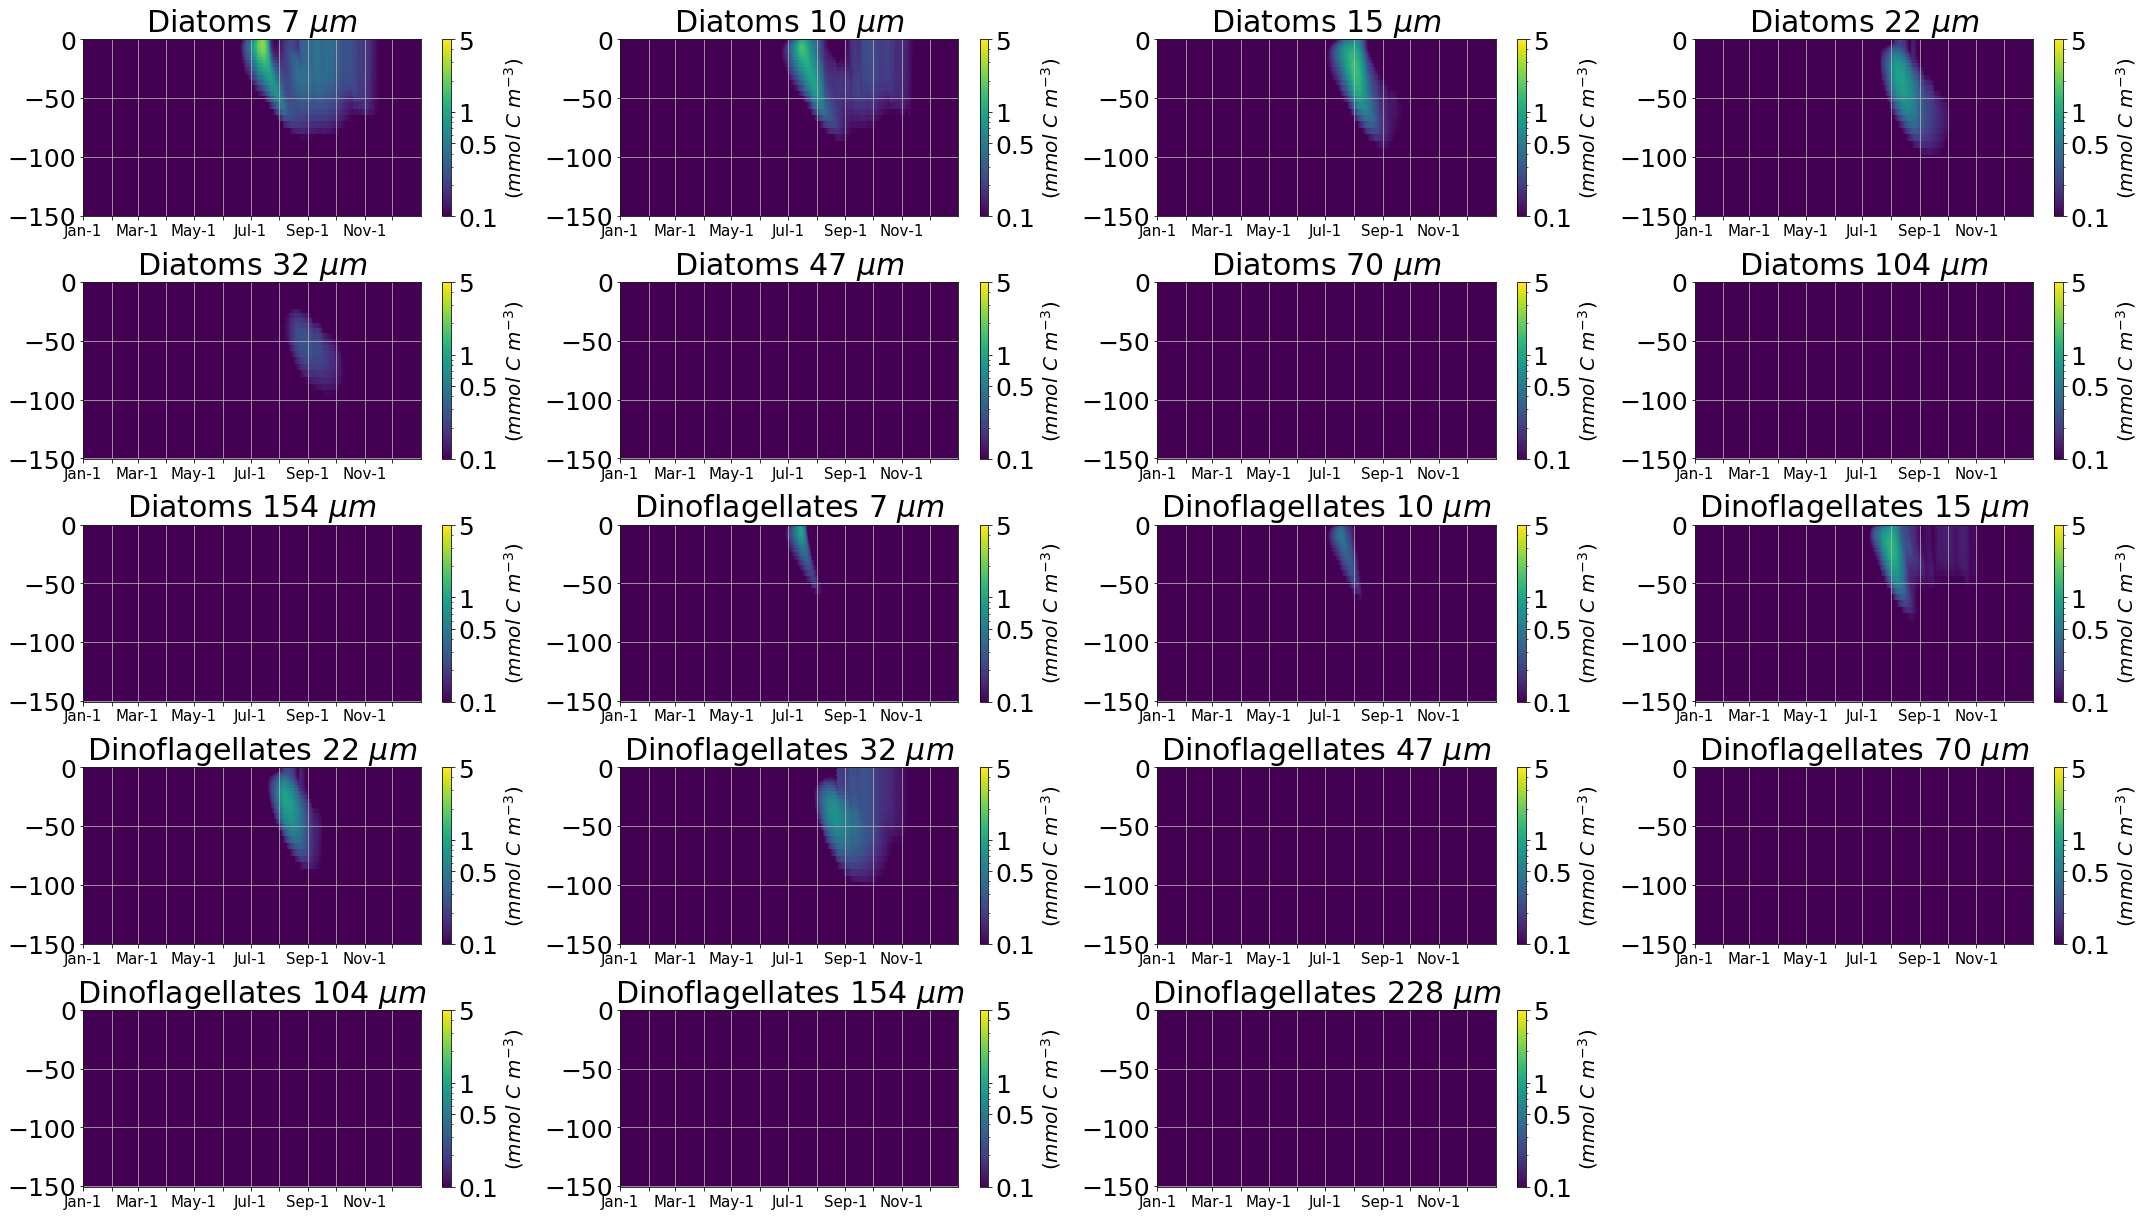

In [25]:
carfile='car.0000000000.t001.nc'
RF_above151=RF[RF>-151]
with plt.style.context('many_heat_maps.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
              181, 212, 243, 273, 304, 334])
    labels=('Jan-1','','Mar-1','','May-1','',
            'Jul-1','','Sep-1','','Nov-1','')
    fig,axs=plt.subplots(5,4,figsize=(30, 17))
    
    for itracer in range(35,54):
        varname='TRAC'+str(itracer).zfill(2)
        array2d_idepth_iT_modtracerfull=netcdf_tools.read_netcdf(carfile, varname)\
.squeeze().transpose()
        ax=axs[(itracer-35)//4,(itracer-35)%4]
        im=ax.pcolormesh(first_year366,
                         RF_above151,
                         array2d_idepth_iT_modtracerfull[0:(RF_above151.size)-1,
                                                         array1d_iT1y_iTtempo],
                         norm=mpl.colors.LogNorm(vmin=0.1,vmax=5))
        longname=get_longname(varname)
        ax.set_title(longname)
        ax.set_xticklabels([])
        ax.set_xlim(first_year366[0],first_year366[-1])
        ax.grid()
        ax.set_xticks(locs)
        ax.set_xticklabels(labels)
        ax.set_yticks([0,-50,-100,-150])
        fig.colorbar(im,
                     ax=ax,
                     ticks=[0.1,0.5,1,5],
                     format='%.1g',
                     label='$(mmol\ C\ m^{-3})$')
        
    # --- NOTHING
    ax=axs[4,3]
    ax.axis('off')
    
    fig.tight_layout()
    plt.savefig('car.0000000000.t001.year'\
                +str(iyeartempo)+'.diatoms.dino.png')

Figure 7. Diatoms and mixotrophic dinoflagellates
for the $10^{th}$ year of the simulation.

### Diatoms and mixotrophic dinoflagellates for the $20^{th}$ year

In [26]:
# iyeartempo=20

In [27]:
# array1d_iT1y_iTtempo=np.arange(365*(iyeartempo-1)+0,365*(iyeartempo-1)+365)
# first_year366=np.arange(0,366) # first year for heatmaps

In [28]:
# carfile='car.0000000000.t001.nc'
# RF_above151=RF[RF>-151]
# with plt.style.context('many_heat_maps.mplstyle'):
#     locs=np.array([0, 31, 59, 90, 120, 151,
#               181, 212, 243, 273, 304, 334])
#     labels=('Jan-1','','Mar-1','','May-1','',
#             'Jul-1','','Sep-1','','Nov-1','')
#     fig,axs=plt.subplots(5,4,figsize=(30, 17))
    
#     for itracer in range(35,54):
#         varname='TRAC'+str(itracer).zfill(2)
#         array2d_idepth_iT_modtracerfull=netcdf_tools.read_netcdf(carfile, varname)\
# .squeeze().transpose()
#         ax=axs[(itracer-35)//4,(itracer-35)%4]
#         im=ax.pcolormesh(first_year366,
#                          RF_above151,
#                          array2d_idepth_iT_modtracerfull[0:(RF_above151.size)-1,
#                                                          array1d_iT1y_iTtempo],
#                          norm=mpl.colors.LogNorm(vmin=0.1,vmax=5))
#         longname=get_longname(varname)
#         ax.set_title(longname)
#         ax.set_xticklabels([])
#         ax.set_xlim(first_year366[0],first_year366[-1])
#         ax.grid()
#         ax.set_xticks(locs)
#         ax.set_xticklabels(labels)
#         ax.set_yticks([0,-50,-100,-150])
#         fig.colorbar(im,
#                      ax=ax,
#                      ticks=[0.1,0.5,1,5],
#                      format='%.1g',
#                      label='$(mmol\ C\ m^{-3})$')
        
#     # --- NOTHING
#     ax=axs[4,3]
#     ax.axis('off')
    
#     fig.tight_layout()
#     plt.savefig('car.0000000000.t001.year'\
#                 +str(iyeartempo)+'.diatoms.dino.png')

Figure 8. Diatoms and mixotrophic dinoflagellates
for the $20^{th}$ year of the simulation.

### Diatoms and mixotrophic dinoflagellates for $10$ years

In [29]:
nbyr=10

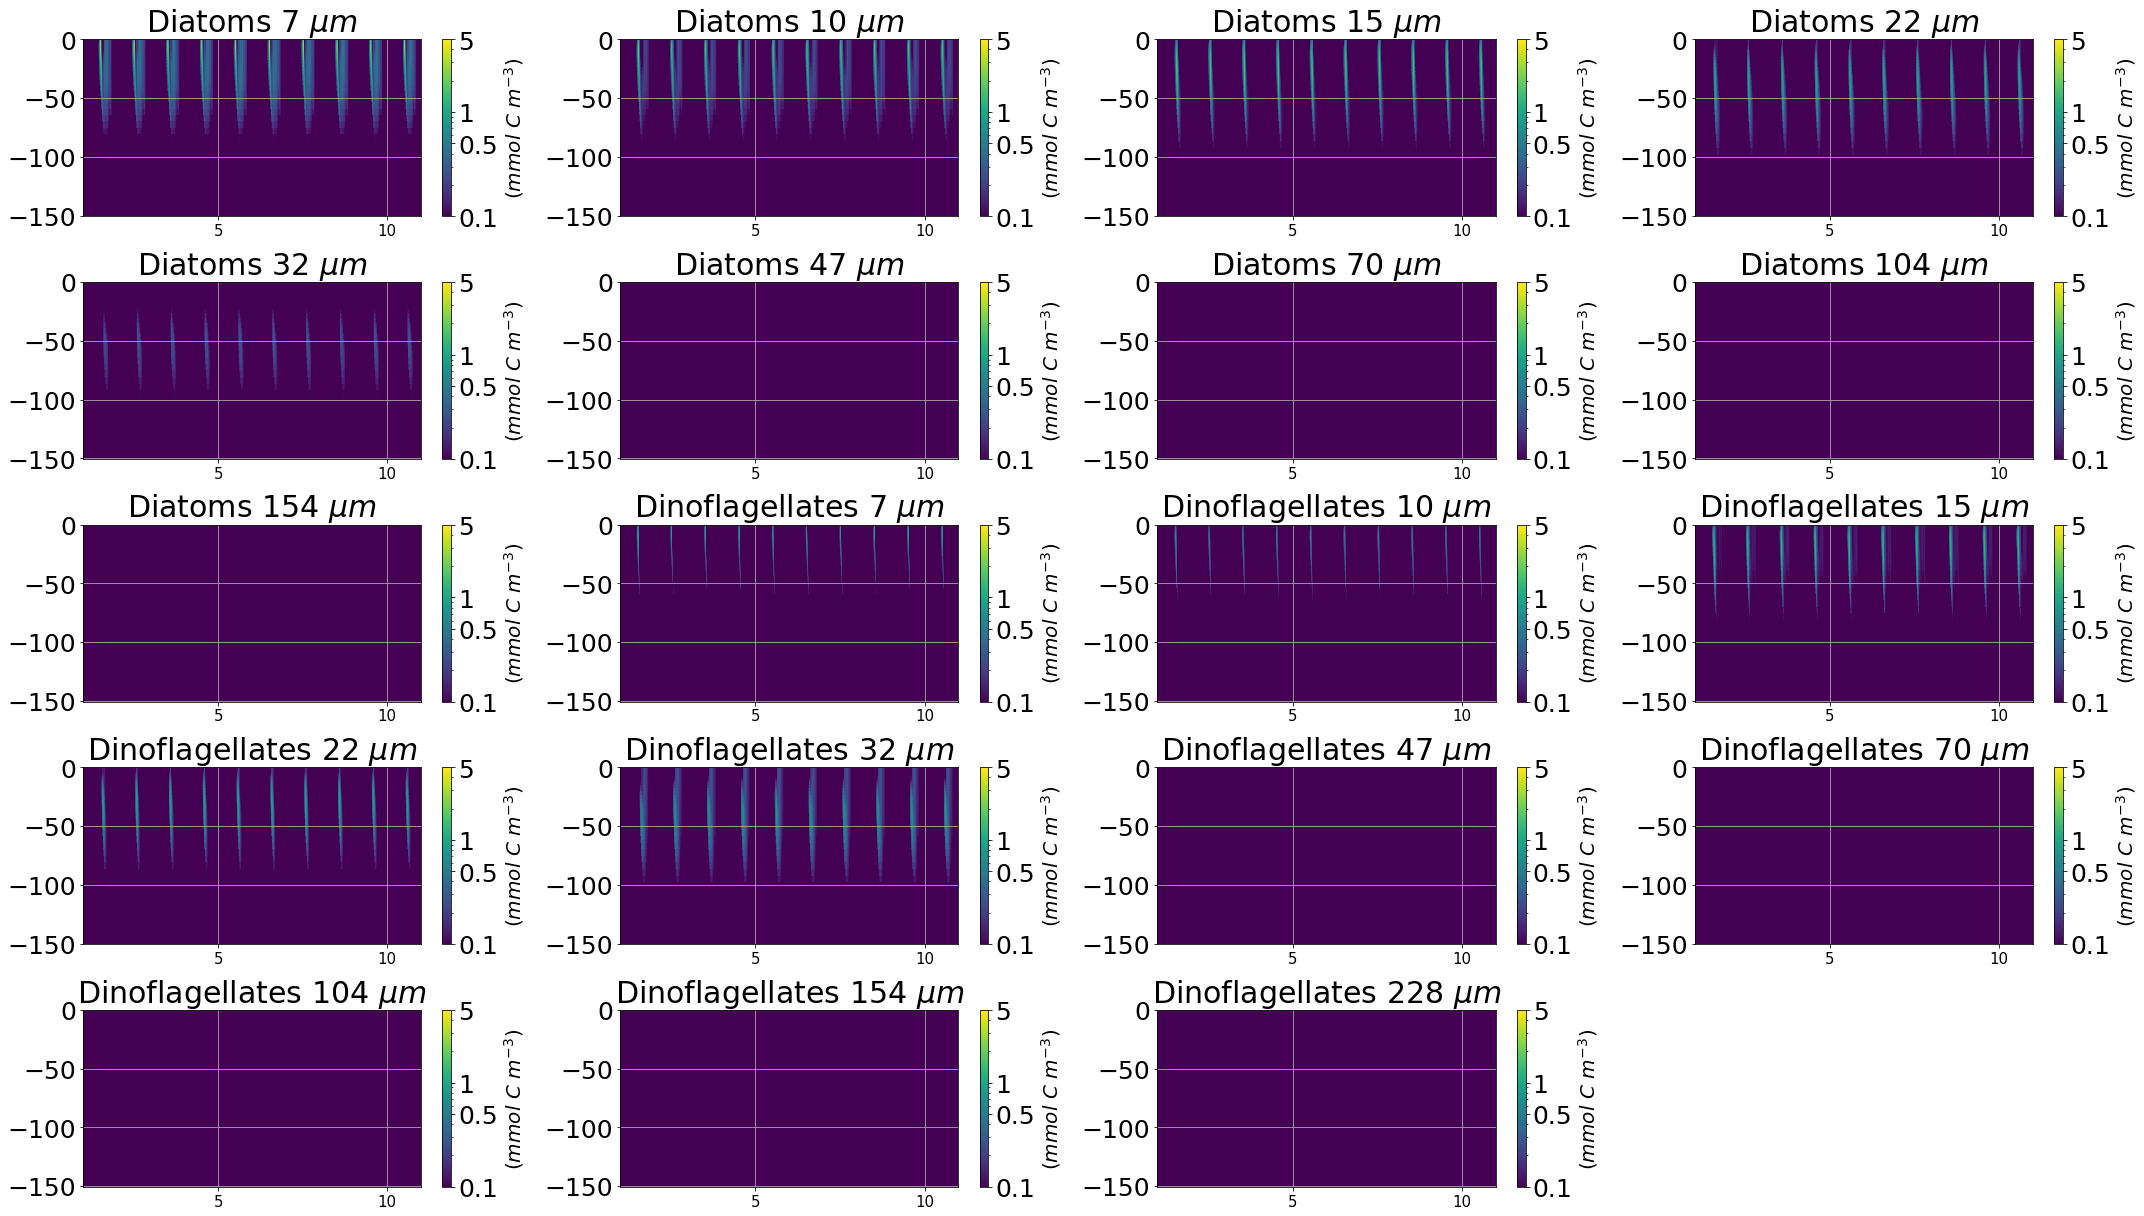

In [30]:
array1d_iT_iTforplot=np.arange(1,365*nbyr+1)
array1d_iT_iTforpcolormesh=np.arange(1,365*nbyr+2)
locs=list()
labels=range(5,nbyr+1,5)
for year in labels:
    loc=1+365*(year-1)
    locs.append(loc)
RF_above151=RF[RF>-151]
with plt.style.context('many_heat_maps.mplstyle'):
    fig,axs=plt.subplots(5,4,figsize=(30, 17))
    for itracer in range(35,54):
        varname='TRAC'+str(itracer).zfill(2)
        array2d_idepth_iT_modtracerfull=netcdf_tools.read_netcdf(carfile, varname)\
.squeeze().transpose()
        ax=axs[(itracer-35)//4,(itracer-35)%4]
        im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                         RF_above151,
                         array2d_idepth_iT_modtracerfull[0:(RF_above151.size)-1,
                                                         0:(365*nbyr)],
                         norm=mpl.colors.LogNorm(vmin=0.1,vmax=5))
        longname=get_longname(varname)
        ax.set_title(longname)
        ax.grid()
        ax.set_xticks(locs)
        ax.set_xticklabels(labels)
        ax.set_yticks([0,-50,-100,-150])
        fig.colorbar(im,
                     ax=ax,
                     ticks=[0.1,0.5,1,5],
                     format='%.1g',
                     label='$(mmol\ C\ m^{-3})$')
        
    # --- NOTHING
    ax=axs[4,3]
    ax.axis('off')
    
    fig.tight_layout()
    plt.savefig('car.0000000000.t001.allyears.diatoms.dino.png')

Figure 9. Diatoms and mixotrophic dinoflagellates
for the 10 years of the simulation.

## Zooplankton

### Zooplankton for the $10^{th}$ year

In [31]:
iyeartempo=10

In [32]:
array1d_iT1y_iTtempo=np.arange(365*(iyeartempo-1)+0,365*(iyeartempo-1)+365)
first_year366=np.arange(0,366) # first year for heatmaps

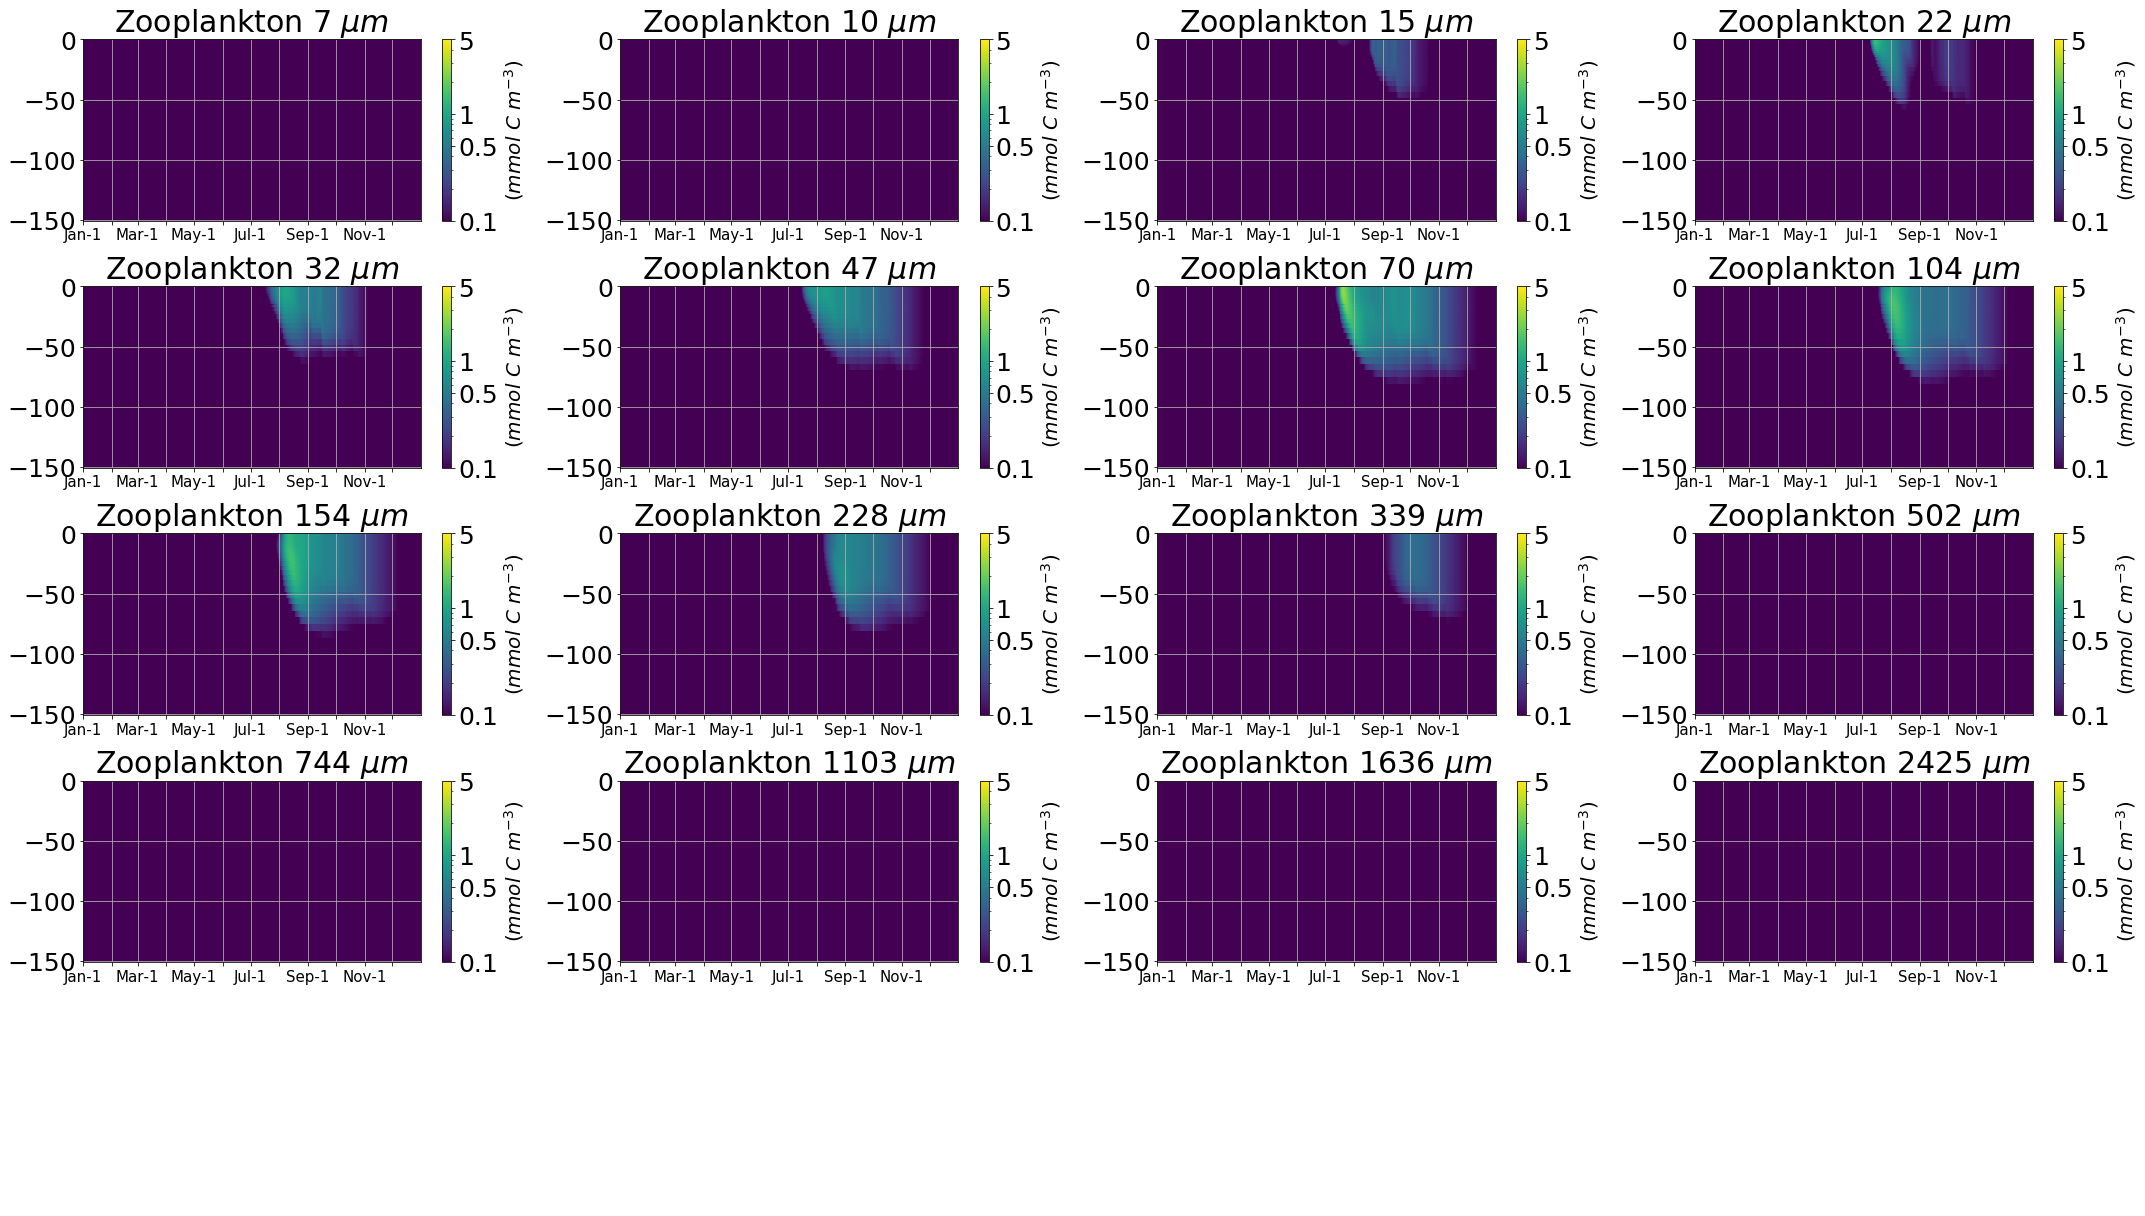

In [33]:
carfile='car.0000000000.t001.nc'
RF_above151=RF[RF>-151]
with plt.style.context('many_heat_maps.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
              181, 212, 243, 273, 304, 334])
    labels=('Jan-1','','Mar-1','','May-1','',
            'Jul-1','','Sep-1','','Nov-1','')
    fig,axs=plt.subplots(5,4,figsize=(30, 17))
    
    for itracer in range(54,70):
        varname='TRAC'+str(itracer).zfill(2)
        array2d_idepth_iT_modtracerfull=netcdf_tools.read_netcdf(carfile, varname)\
.squeeze().transpose()
        ax=axs[(itracer-54)//4,(itracer-54)%4]
        im=ax.pcolormesh(first_year366,
                         RF_above151,
                         array2d_idepth_iT_modtracerfull[0:(RF_above151.size)-1,
                                                         array1d_iT1y_iTtempo],
                         norm=mpl.colors.LogNorm(vmin=0.1,vmax=5))
        longname=get_longname(varname)
        ax.set_title(longname)
        ax.set_xticklabels([])
        ax.set_xlim(first_year366[0],first_year366[-1])
        ax.grid()
        ax.set_xticks(locs)
        ax.set_xticklabels(labels)
        ax.set_yticks([0,-50,-100,-150])
        fig.colorbar(im,
                     ax=ax,
                     ticks=[0.1,0.5,1,5],
                     format='%.1g',
                     label='$(mmol\ C\ m^{-3})$')
        
    # --- NOTHING
    ax=axs[4,0]
    ax.axis('off')
    ax=axs[4,1]
    ax.axis('off')
    ax=axs[4,2]
    ax.axis('off')
    ax=axs[4,3]
    ax.axis('off')
    
    fig.tight_layout()
    plt.savefig('car.0000000000.t001.year'\
                +str(iyeartempo)+'.zoo.png')

Figure 10. Zooplankton
for the $10^{th}$ year of the simulation.

### Zooplankton for the $20^{th}$ year

In [34]:
# iyeartempo=20

In [35]:
# array1d_iT1y_iTtempo=np.arange(365*(iyeartempo-1)+0,365*(iyeartempo-1)+365)
# first_year366=np.arange(0,366) # first year for heatmaps

In [36]:
# carfile='car.0000000000.t001.nc'
# RF_above151=RF[RF>-151]
# with plt.style.context('many_heat_maps.mplstyle'):
#     locs=np.array([0, 31, 59, 90, 120, 151,
#               181, 212, 243, 273, 304, 334])
#     labels=('Jan-1','','Mar-1','','May-1','',
#             'Jul-1','','Sep-1','','Nov-1','')
#     fig,axs=plt.subplots(5,4,figsize=(30, 17))
    
#     for itracer in range(54,70):
#         varname='TRAC'+str(itracer).zfill(2)
#         array2d_idepth_iT_modtracerfull=netcdf_tools.read_netcdf(carfile, varname)\
# .squeeze().transpose()
#         ax=axs[(itracer-54)//4,(itracer-54)%4]
#         im=ax.pcolormesh(first_year366,
#                          RF_above151,
#                          array2d_idepth_iT_modtracerfull[0:(RF_above151.size)-1,
#                                                          array1d_iT1y_iTtempo],
#                          norm=mpl.colors.LogNorm(vmin=0.1,vmax=5))
#         longname=get_longname(varname)
#         ax.set_title(longname)
#         ax.set_xticklabels([])
#         ax.set_xlim(first_year366[0],first_year366[-1])
#         ax.grid()
#         ax.set_xticks(locs)
#         ax.set_xticklabels(labels)
#         ax.set_yticks([0,-50,-100,-150])
#         fig.colorbar(im,
#                      ax=ax,
#                      ticks=[0.1,0.5,1,5],
#                      format='%.1g',
#                      label='$(mmol\ C\ m^{-3})$')
        
#     # --- NOTHING
#     ax=axs[4,0]
#     ax.axis('off')
#     ax=axs[4,1]
#     ax.axis('off')
#     ax=axs[4,2]
#     ax.axis('off')
#     ax=axs[4,3]
#     ax.axis('off')
    
#     fig.tight_layout()
#     plt.savefig('car.0000000000.t001.year'\
#                 +str(iyeartempo)+'.zoo.png')

Figure 11. Zooplankton
for the $20^{th}$ year of the simulation.

### Zooplankton for $10$ years

In [37]:
nbyr=10

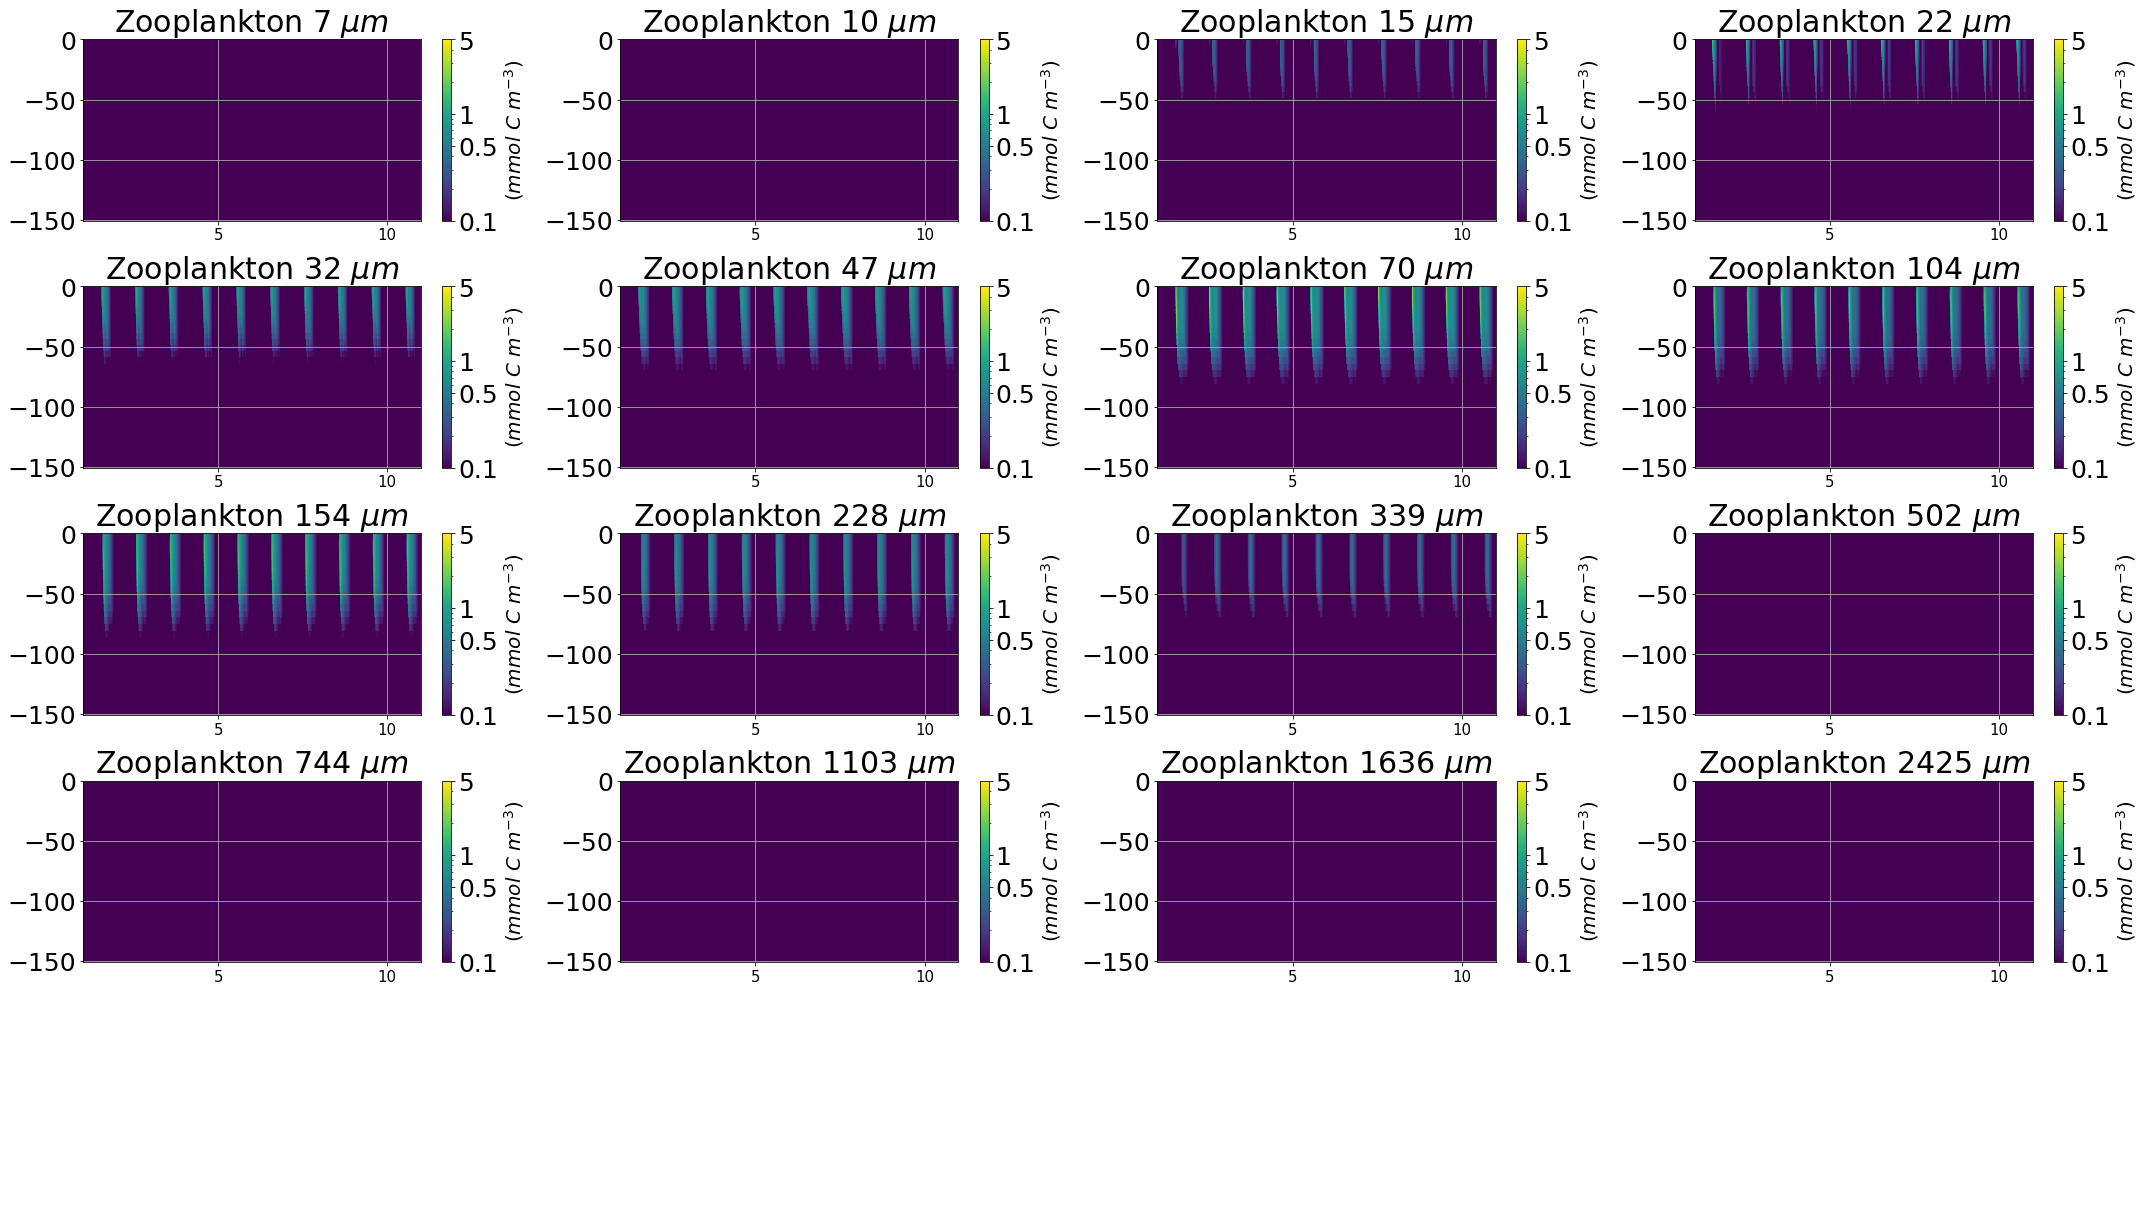

In [38]:
array1d_iT_iTforplot=np.arange(1,365*nbyr+1)
array1d_iT_iTforpcolormesh=np.arange(1,365*nbyr+2)
locs=list()
labels=range(5,nbyr+1,5)
for year in labels:
    loc=1+365*(year-1)
    locs.append(loc)
RF_above151=RF[RF>-151]
with plt.style.context('many_heat_maps.mplstyle'):
    fig,axs=plt.subplots(5,4,figsize=(30, 17))
    for itracer in range(54,70):
        varname='TRAC'+str(itracer).zfill(2)
        array2d_idepth_iT_modtracerfull=netcdf_tools.read_netcdf(carfile, varname)\
.squeeze().transpose()
        ax=axs[(itracer-54)//4,(itracer-54)%4]
        im=ax.pcolormesh(array1d_iT_iTforpcolormesh,
                         RF_above151,
                         array2d_idepth_iT_modtracerfull[0:(RF_above151.size)-1,
                                                         0:(365*nbyr)],
                         norm=mpl.colors.LogNorm(vmin=0.1,vmax=5))
        longname=get_longname(varname)
        ax.set_title(longname)
        ax.grid()
        ax.set_xticks(locs)
        ax.set_xticklabels(labels)
        ax.set_yticks([0,-50,-100,-150])
        fig.colorbar(im,
                     ax=ax,
                     ticks=[0.1,0.5,1,5],
                     format='%.1g',
                     label='$(mmol\ C\ m^{-3})$')
        
    # --- NOTHING
    ax=axs[4,0]
    ax.axis('off')
    ax=axs[4,1]
    ax.axis('off')
    ax=axs[4,2]
    ax.axis('off')
    ax=axs[4,3]
    ax.axis('off')
    
    fig.tight_layout()
    plt.savefig('car.0000000000.t001.allyears.zoo.png')

Figure 12. Zooplankton
for the 10 years of the simulation.